In [228]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [229]:
df = pd.read_csv('2019-10-21_dotline.csv',delimiter = ',',index_col= 'time')
df.index = pd.to_datetime(df.index)

In [230]:
df.shape

(8159, 4)

In [231]:
df = df.replace("b''", np.nan)

In [232]:
df.head()

,signal,feeder,pump,condition
time,,,,
2019-10-20 15:08:12,play,NaN,NaN,R reward
2019-10-20 15:08:22,NaN,NaN,NaN,R reward
2019-10-20 15:08:32,play,NaN,NaN,R reward
2019-10-20 15:08:42,NaN,NaN,NaN,R reward
2019-10-20 15:08:52,play,NaN,NaN,R reward


In [233]:
df.drop(['signal','pump'], axis=1, inplace=True)

In [234]:
df_clean = df.dropna(subset=['condition', 'feeder'])

In [235]:
df_clean

,feeder,condition
time,,
2019-10-20 19:38:16,b'1',R reward
2019-10-20 19:38:17,b'1',R reward
2019-10-20 19:38:19,b'1',R reward
2019-10-20 19:39:09,b'1',R reward
2019-10-20 19:39:12,b'1',R reward
2019-10-20 19:39:13,b'1',R reward
2019-10-20 19:39:14,b'1',R reward
2019-10-20 19:39:15,b'1',R reward
2019-10-20 19:39:16,b'1',R reward


In [236]:
activity_df = df.groupby(pd.Grouper(freq='15Min', base=8, label='right'))['feeder'].value_counts(normalize=True)

In [237]:
activity_df.head()

time                 feeder
2019-10-20 19:53:00  b'1'      0.526596
                     b'2'      0.473404
2019-10-20 20:08:00  b'1'      0.916667
                     b'2'      0.083333
2019-10-20 20:23:00  b'2'      0.524823
Name: feeder, dtype: float64

In [238]:
activity_df = pd.DataFrame(activity_df)

In [239]:
activity_df.index

MultiIndex(levels=[[2019-10-20 15:23:00, 2019-10-20 15:38:00, 2019-10-20 15:53:00, 2019-10-20 16:08:00, 2019-10-20 16:23:00, 2019-10-20 16:38:00, 2019-10-20 16:53:00, 2019-10-20 17:08:00, 2019-10-20 17:23:00, 2019-10-20 17:38:00, 2019-10-20 17:53:00, 2019-10-20 18:08:00, 2019-10-20 18:23:00, 2019-10-20 18:38:00, 2019-10-20 18:53:00, 2019-10-20 19:08:00, 2019-10-20 19:23:00, 2019-10-20 19:38:00, 2019-10-20 19:53:00, 2019-10-20 20:08:00, 2019-10-20 20:23:00, 2019-10-20 20:38:00, 2019-10-20 20:53:00, 2019-10-20 21:08:00, 2019-10-20 21:23:00, 2019-10-20 21:38:00, 2019-10-20 21:53:00, 2019-10-20 22:08:00, 2019-10-20 22:23:00, 2019-10-20 22:38:00, 2019-10-20 22:53:00, 2019-10-20 23:08:00, 2019-10-20 23:23:00, 2019-10-20 23:38:00, 2019-10-20 23:53:00, 2019-10-21 00:08:00, 2019-10-21 00:23:00, 2019-10-21 00:38:00, 2019-10-21 00:53:00, 2019-10-21 01:08:00, 2019-10-21 01:23:00, 2019-10-21 01:38:00, 2019-10-21 01:53:00, 2019-10-21 02:08:00, 2019-10-21 02:23:00, 2019-10-21 02:38:00, 2019-10-21 02:

In [240]:
activity_df.loc['2019-10-20 19:53:00':'2019-10-20 20:08:00']

feeder
time                feeder          
2019-10-20 19:53:00 b'1'    0.526596
                    b'2'    0.473404
2019-10-20 20:08:00 b'1'    0.916667
                    b'2'    0.083333

In [241]:
activity_df_right = activity_df.xs("b'2'", level='feeder')

In [242]:
activity_df.loc[('2019-10-20 19:53:00', "b'2'")]

feeder    0.473404
Name: (2019-10-20 19:53:00, b'2'), dtype: float64

In [243]:
activity_df_right.head()

,feeder
time,
2019-10-20 19:53:00,0.473404
2019-10-20 20:08:00,0.083333
2019-10-20 20:23:00,0.524823
2019-10-20 20:38:00,0.488889
2019-10-20 20:53:00,0.661417


In [244]:
activity_df_right['feeder'].head()

time
2019-10-20 19:53:00    0.473404
2019-10-20 20:08:00    0.083333
2019-10-20 20:23:00    0.524823
2019-10-20 20:38:00    0.488889
2019-10-20 20:53:00    0.661417
Name: feeder, dtype: float64

In [245]:
activity_df_right['feeder'].to_csv("right_preference")

/Applications/anaconda3/envs/eye/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [246]:
df_clean.shift().shape

(1828, 2)

In [247]:
df_clean_no_idx = df_clean.reset_index()

In [248]:
df_conds = pd.concat([df_clean_no_idx['condition'], df_clean_no_idx['condition'].shift()], axis=1)

In [249]:
df_conds.columns = ['cond1', 'cond2']

In [250]:
idx = df_conds[df_conds['cond1'] != df_conds['cond2']].index

In [251]:
df_clean_no_idx.shift().loc[idx]['time']

0                      NaT
228    2019-10-20 20:08:27
654    2019-10-20 20:56:50
990    2019-10-20 22:08:42
1248   2019-10-21 00:25:43
1351   2019-10-21 01:57:08
1596   2019-10-21 05:09:17
1762   2019-10-21 06:08:37
1823   2019-10-21 07:01:28
Name: time, dtype: datetime64[ns]

In [252]:
idx_list = list(idx)

In [253]:
idx_list.remove(0)

In [254]:
idx_list = [x-1 for x in idx_list]

In [255]:
idx_list_max = idx_list + [df_clean.index.shape[0]-1]
idx_list_min = [0] + [x+1 for x in idx_list]

In [256]:
idx_list_min

[0, 228, 654, 990, 1248, 1351, 1596, 1762, 1823]

In [257]:
idx_list_max

[227, 653, 989, 1247, 1350, 1595, 1761, 1822, 1827]

In [258]:
# 

df_clean.iloc[idx_list]

,feeder,condition
time,,
2019-10-20 20:08:27,b'1',R reward
2019-10-20 20:56:50,b'1',L reward
2019-10-20 22:08:42,b'2',R reward
2019-10-21 00:25:43,b'2',L reward
2019-10-21 01:57:08,b'1',R reward
2019-10-21 05:09:17,b'1',L reward
2019-10-21 06:08:37,b'2',R reward
2019-10-21 07:01:28,b'1',L reward


In [259]:
df_min = df_clean.iloc[idx_list_min]

In [260]:
df_max = df_clean.iloc[idx_list_max]

In [261]:
df_clean.index.shape

(1828,)

In [262]:
df_min.index

DatetimeIndex(['2019-10-20 19:38:16', '2019-10-20 20:11:16',
               '2019-10-20 21:09:25', '2019-10-20 22:08:43',
               '2019-10-21 01:42:01', '2019-10-21 02:15:23',
               '2019-10-21 05:09:18', '2019-10-21 06:12:59',
               '2019-10-21 07:12:59'],
              dtype='datetime64[ns]', name='time', freq=None)

In [263]:
df_max.index

DatetimeIndex(['2019-10-20 20:08:27', '2019-10-20 20:56:50',
               '2019-10-20 22:08:42', '2019-10-21 00:25:43',
               '2019-10-21 01:57:08', '2019-10-21 05:09:17',
               '2019-10-21 06:08:37', '2019-10-21 07:01:28',
               '2019-10-21 07:13:03'],
              dtype='datetime64[ns]', name='time', freq=None)

In [264]:
condition_start_end = list(zip(df_min.index, df_max.index))

In [265]:
condition_start_end

[(Timestamp('2019-10-20 19:38:16'), Timestamp('2019-10-20 20:08:27')),
 (Timestamp('2019-10-20 20:11:16'), Timestamp('2019-10-20 20:56:50')),
 (Timestamp('2019-10-20 21:09:25'), Timestamp('2019-10-20 22:08:42')),
 (Timestamp('2019-10-20 22:08:43'), Timestamp('2019-10-21 00:25:43')),
 (Timestamp('2019-10-21 01:42:01'), Timestamp('2019-10-21 01:57:08')),
 (Timestamp('2019-10-21 02:15:23'), Timestamp('2019-10-21 05:09:17')),
 (Timestamp('2019-10-21 05:09:18'), Timestamp('2019-10-21 06:08:37')),
 (Timestamp('2019-10-21 06:12:59'), Timestamp('2019-10-21 07:01:28')),
 (Timestamp('2019-10-21 07:12:59'), Timestamp('2019-10-21 07:13:03'))]

In [266]:
df_clean.head()

,feeder,condition
time,,
2019-10-20 19:38:16,b'1',R reward
2019-10-20 19:38:17,b'1',R reward
2019-10-20 19:38:19,b'1',R reward
2019-10-20 19:39:09,b'1',R reward
2019-10-20 19:39:12,b'1',R reward


In [267]:
df_clean_b1 = df_clean[df_clean['feeder'] == "b'1'"]

In [268]:
np.random.rand(df_clean.index.shape[0])

array([0.71432223, 0.34503254, 0.1590965 , ..., 0.54106977, 0.25799662,
       0.55997569])

In [279]:
activity_df_right['feeder']

time
2019-10-20 19:53:00    0.473404
2019-10-20 20:08:00    0.083333
2019-10-20 20:23:00    0.524823
2019-10-20 20:38:00    0.488889
2019-10-20 20:53:00    0.661417
2019-10-20 21:08:00    0.745098
2019-10-20 21:23:00    0.993750
2019-10-20 21:38:00    1.000000
2019-10-20 21:53:00    0.584906
2019-10-20 22:08:00    0.625000
2019-10-20 22:23:00    0.375000
2019-10-20 22:38:00    0.310345
2019-10-20 22:53:00    0.780000
2019-10-21 00:38:00    1.000000
2019-10-21 01:53:00    1.000000
2019-10-21 02:23:00    0.371134
2019-10-21 02:38:00    0.352941
2019-10-21 04:23:00    1.000000
2019-10-21 05:08:00    0.571429
2019-10-21 05:23:00    0.276316
2019-10-21 05:38:00    0.687500
2019-10-21 05:53:00    0.676471
2019-10-21 06:08:00    0.948718
2019-10-21 06:23:00    0.821429
2019-10-21 06:38:00    0.833333
2019-10-21 06:53:00    1.000000
2019-10-21 07:08:00    0.400000
2019-10-21 07:23:00    1.000000
Name: feeder, dtype: float64

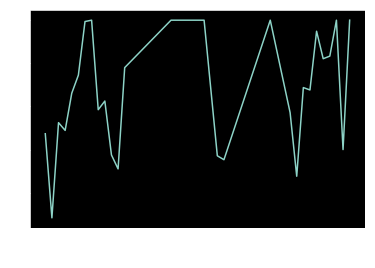

In [273]:
import matplotlib.dates as md
# fig = plt.figure(figsize=(10,10))
# plt.plot(activity_df_right)
figtemp, ax = plt.subplots(1, 1)
ax.plot(activity_df_right)
## Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
## Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

<Figure size 720x720 with 0 Axes>

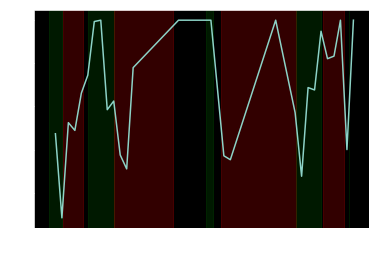

In [287]:
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
ax.plot(activity_df_right)
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = {'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])


<Figure size 720x720 with 0 Axes>

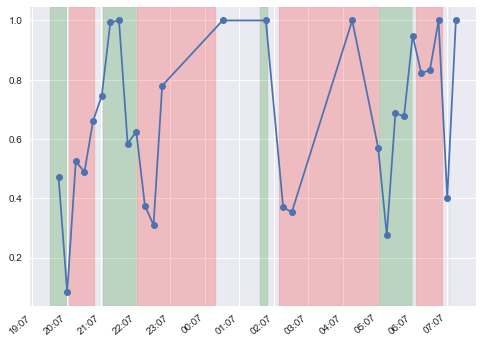

In [306]:
pref_df = pd.read_csv('right_preference', header = None, names = ('time', 'pref'))
pref_df['time'] = pd.to_datetime(pref_df['time'])
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
# ax.plot(activity_df_right)
# ax.scatter(pref_df['time'], pref_df['pref'])
# ax = pref_df.plot.scatter(x='time',y = 'pref')
plt.style.use('seaborn')
plt.plot_date(pref_df['time'], pref_df['pref'], linestyle='solid')
# pref_df.plot(x='time', y='pref', kind='scatter', ax=ax)
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = {'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])

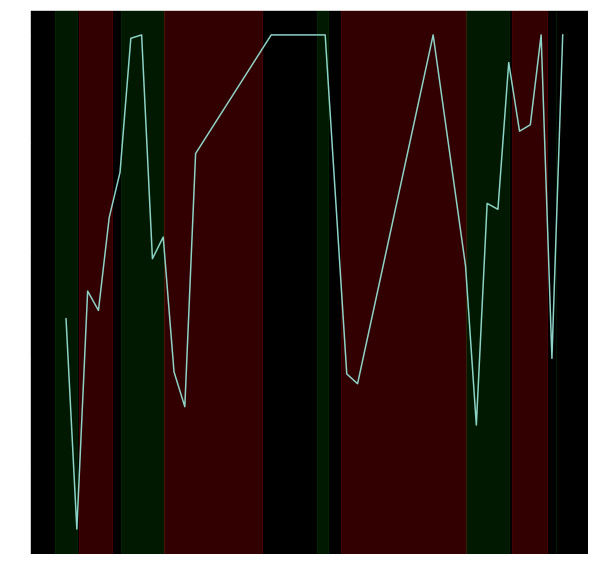

In [222]:
fig = plt.figure(figsize=(10,10))
# plt.plot(df_clean.index, )
plt.plot(activity_df_right)
# df_clean.plot(x=df_clean.time, y=1)
# plt.bar(gene_positions, cov_per_pos, width=1.0, facecolor='blue', edgecolor='blue')
# exon_pos_flat = []
cond_dict = {'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])
			# for pos in exon_pos_flat
				# print(pos)
				# plt.fill_between(pos, max_y, alpha=0.2, color='r')

In [0]:
df_min